In [1]:
#OMC mode scan peak identification / PZT linearization

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import argrelextrema
import peakutils

%matplotlib inline

ImportError: No module named peakutils

In [4]:
#OMC parameters (LLO)
fsr = 264.8               # [MHz]
tmsH = 57.95            # [MHz]
tmsV = 58.10           # [MHz]
tms  = (tmsH+tmsV)/2;        # [MHz]
fmod1= 9.1002293;              # [MHz]
fmod5= fmod1*5;     
HOM_on = 3

In [5]:
#Koji measured parameters
FSR = 261710400.0
TMS = 57982266.0

In [6]:
#Importing Mode Scan data from text file
scan_data = np.loadtxt("/Users/daniel_vander-hyde/Documents/python/OMC_mode_scan/omc_scans.nosync/OMC_SCAN_11_09_2018_10W_darm_offset.txt")
#scan_data = np.loadtxt("/Users/daniel_vander-hyde/Documents/python/OMC_mode_scan/omc_scans.nosync/OMC_SCAN_11_09_2018_20W_no_darm_offset.txt")
#scan_data2 = np.loadtxt("/Users/daniel_vander-hyde/Documents/python/OMC_mode_scan/omc_scans.nosync/OMC_SCAN_11_09_2018_20W_darm_offset.txt")

(array([1638399]),)
(array([1638400]),)


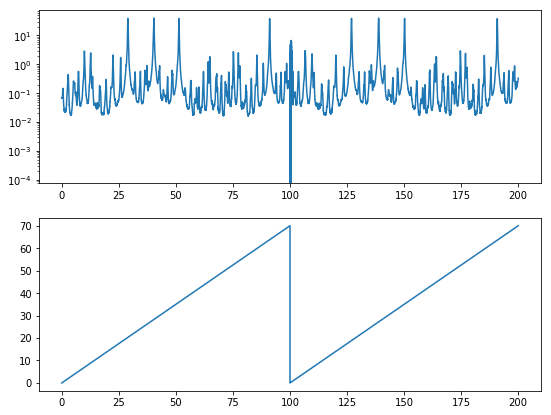

In [5]:
#Plotting entire time series of scan

#Organize data
data = {
    'time' : scan_data[:,0],
    'OMC' : scan_data[:,1],
    'PZT' : scan_data[:,2]
}

#Plotting all OMC data
f, ax = plt.subplots(2, figsize=(9, 7))
ax[0].semilogy(data['time'], data['OMC'])

#Plotting all PZT data
ax[1].plot(data['time'],data['PZT'])
maxima = argrelextrema(data['PZT'],np.greater)
print(maxima)
minima = argrelextrema(data['PZT'],np.less)
print(minima)
PZT_max = [data['PZT'][i] for i in maxima]
PZT_min=  [data['PZT'][i] for i in minima]


[38.527542, 39.512539, 38.326313, 38.03075]
[ 474673  662142  841259 1492208]
[20.280218, 28.289759, 35.942463, 63.754005]
[20.280218 28.289759 35.942463 63.754005]


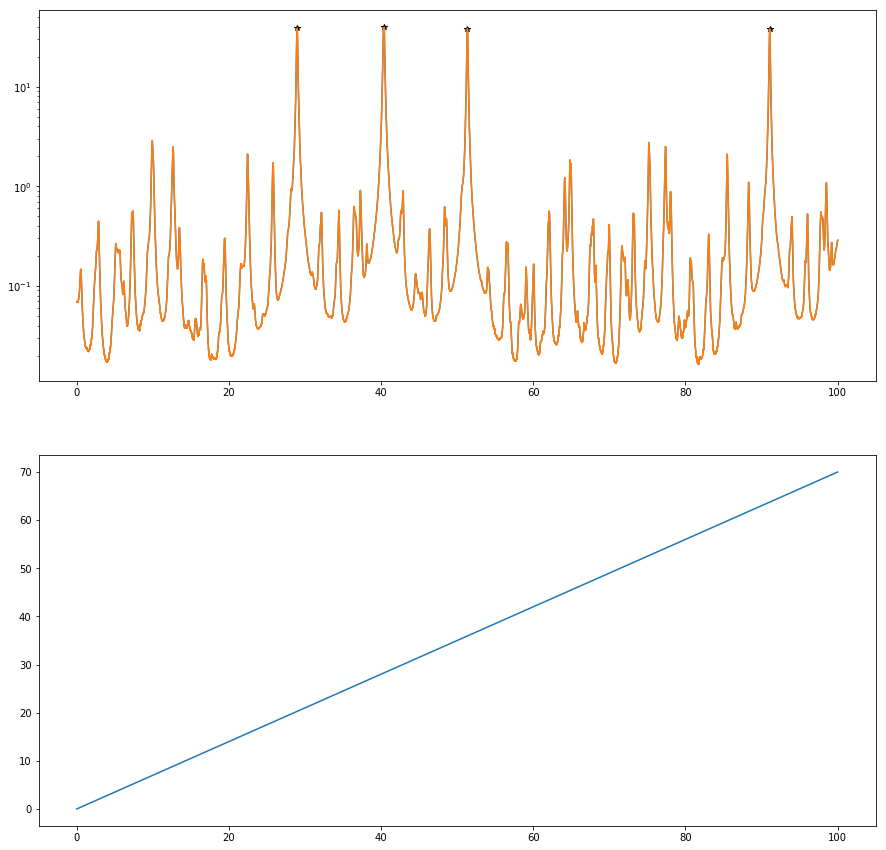

In [18]:
#Grabbing a linear region of the PZT drive

end_lin = min(data['time'], key=lambda x:abs(x-100))
end_lin_ind = np.where(data['time']==end_lin)[0][0]

dat = {
    'time' : data['time'][:end_lin_ind],
    'OMC' : data['OMC'][:end_lin_ind],
    'PZT' : data['PZT'][:end_lin_ind]
}

#Plotting mode scan

f, ax = plt.subplots(2, figsize = (15,15))

#Peak finding in the mode scan (believe this is the 45 MHz sideband)
peaks_45MHz = peakutils.indexes(dat['OMC'], thres= .9, min_dist= 100)

# dictionary containing locations of the peaks and sidebands
SB45 = {
    'ind' : peaks_45MHz,
    'time' : [dat['time'][i] for i in peaks_45MHz],
    'OMC' : [dat['OMC'][i] for i in peaks_45MHz],
    'PZT' : [dat['PZT'][i] for i in peaks_45MHz]
}

ax[0].semilogy(dat['time'], dat['OMC'])
ax[0].semilogy(SB45['time'],SB45['OMC'],'*k')

ax[1].plot(dat['time'], dat['PZT'])
ax[0].semilogy(dat['time'], dat['OMC'])
print(SB45['OMC'])

SB45['PZT']
print(peaks_45MHz)
print(SB45['PZT'])
print(dat['PZT'][peaks_45MHz])
    

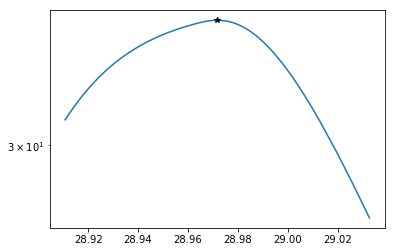

In [22]:

plt.semilogy(dat['time'][(peaks_45MHz[0]-1000):(peaks_45MHz[0]+1000)], dat['OMC'][(peaks_45MHz[0]-1000):(peaks_45MHz[0]+1000)])
plt.semilogy(SB45['time'][0:1],SB45['OMC'][0:1],'*k')

[28.971762]

In [290]:
## get the frequency spread
freq_45SB = [-fmod5, 0, fmod5, -fmod5+fsr]

## polyfit (frequency as a function of PZT counts)
coeff = np.polyfit(dat['PZT'][peaks_45MHz[0:4]],freq_45SB,2)

#frequency
frq = np.polyval(coeff,dat['PZT'])

In [1]:
peaks_45MHz[0:4]

NameError: name 'peaks_45MHz' is not defined

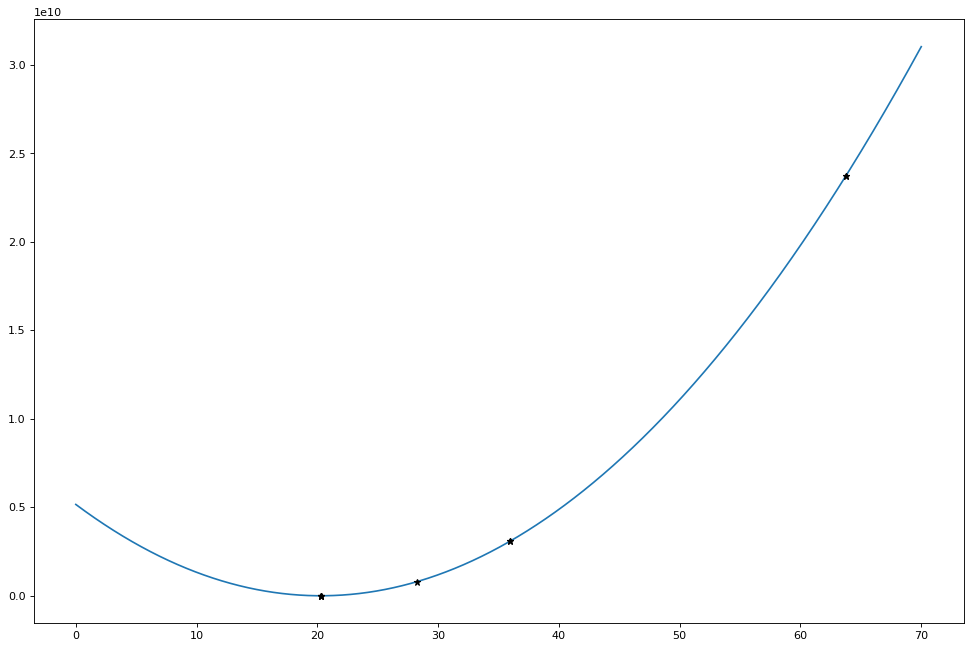

In [291]:
fig7 = plt.figure(figsize=(15, 10), dpi=80)
SB45['frq'] = [frq[t] for t in peaks_45MHz]
plt.plot(dat['PZT'],frq)
plt.plot(SB45['PZT'] ,SB45['frq'],'*k')

In [302]:
a = [0,1,2]
figure
[plt.semilogy(dat['PZT'][peaks_45MHz[w_one[i]]-10000:peaks_45MHz[w_one[i]]+4000], dat['OMC'][peaks_45MHz[w_one[i]]-10000:peaks_45MHz[w_one[i]]+4000]) for i in a] 

TypeError: 'int' object is not subscriptable

In [300]:
dat['PZT'][peaks_45MHz[0]]

20.278851

-3.782474976787853e-05
0


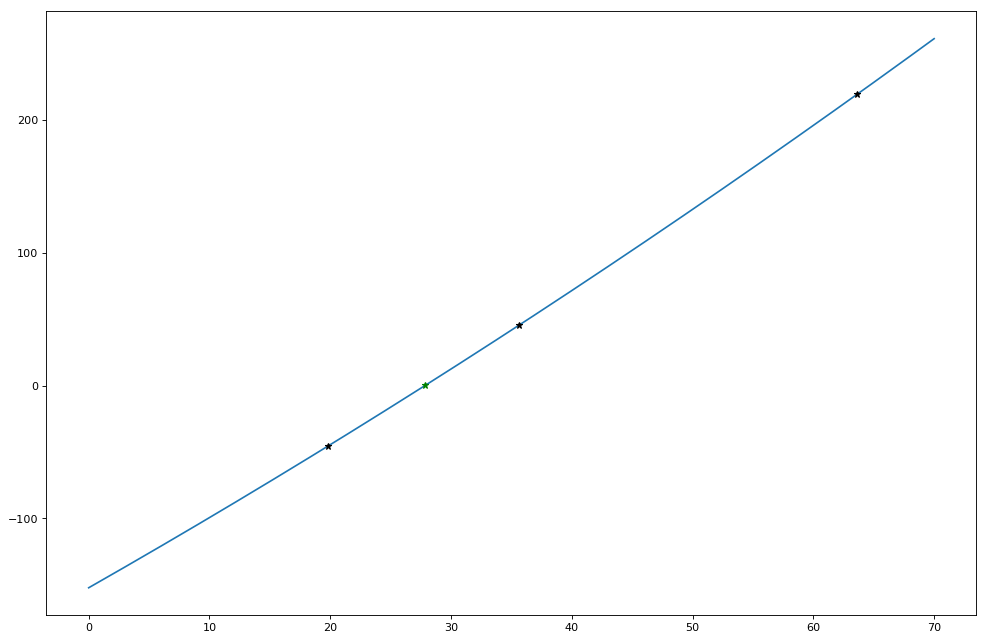

In [249]:
## Finding the carrier
s_width = 50000 #search width
array_car = [0]
ind_car_calc = [i*0 for i in range(len(array_car))]
ind_car_search = [i*0 for i in range(len(array_car))]
for i in range(len(array_car)): 
    loc_car = min(frq, key=lambda x:abs(x-array_car[i]))
    print(loc_car)
    loc_car_ind= np.where(frq==loc_car)[0][0]
    ind_car_calc[i] = loc_car_ind
    peak_search = np.max(dat['OMC'][loc_car_ind-s_width:loc_car_ind+s_width])
    ind_car_search[i] = np.where(dat['OMC'] == peak_search)[0][0]
    print(ind_car[i])
    
carrier = {
    'frq' : [frq[i] for i in ind_car_search],
    'time' : [dat['time'][i] for i in ind_car_search],
    'PZT' : [dat['PZT'][i] for i in ind_car_search],
    'OMC' : [dat['OMC'][i] for i in ind_car_search]
    
}
    

fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(dat['PZT'],frq)
plt.plot(SB45['PZT'] ,SB45['frq'],'*k')
plt.plot(carrier['PZT'], carrier['frq'], '*g')


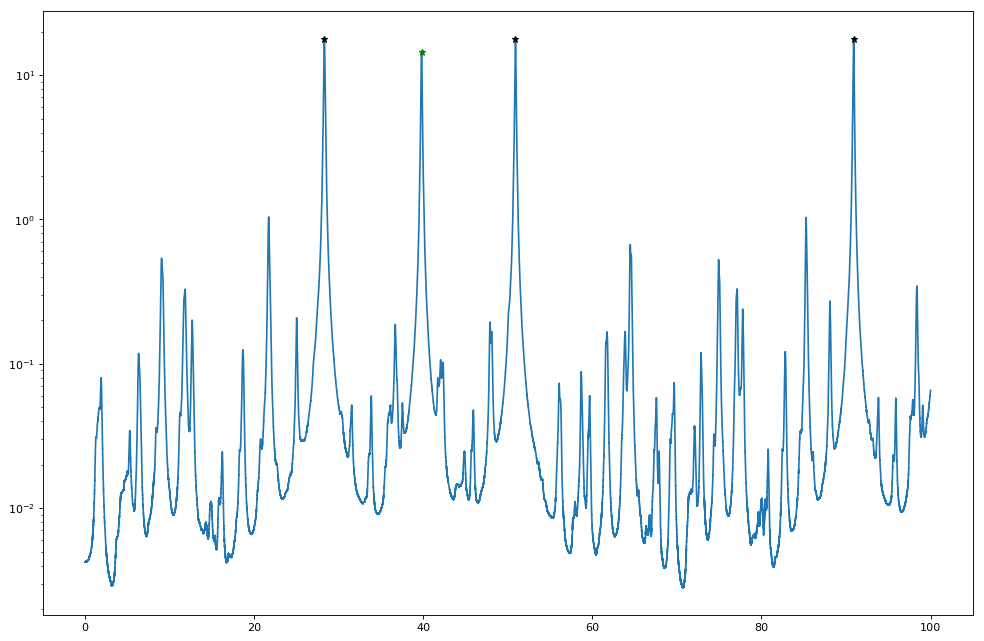

In [250]:
fig10 = plt.figure(figsize=(15, 10), dpi=80)

plt.semilogy(dat['time'], dat['OMC'])
plt.semilogy(SB45['time'] ,SB45['OMC'],'*k')
plt.semilogy(carrier['time'], carrier['OMC'], '*g')

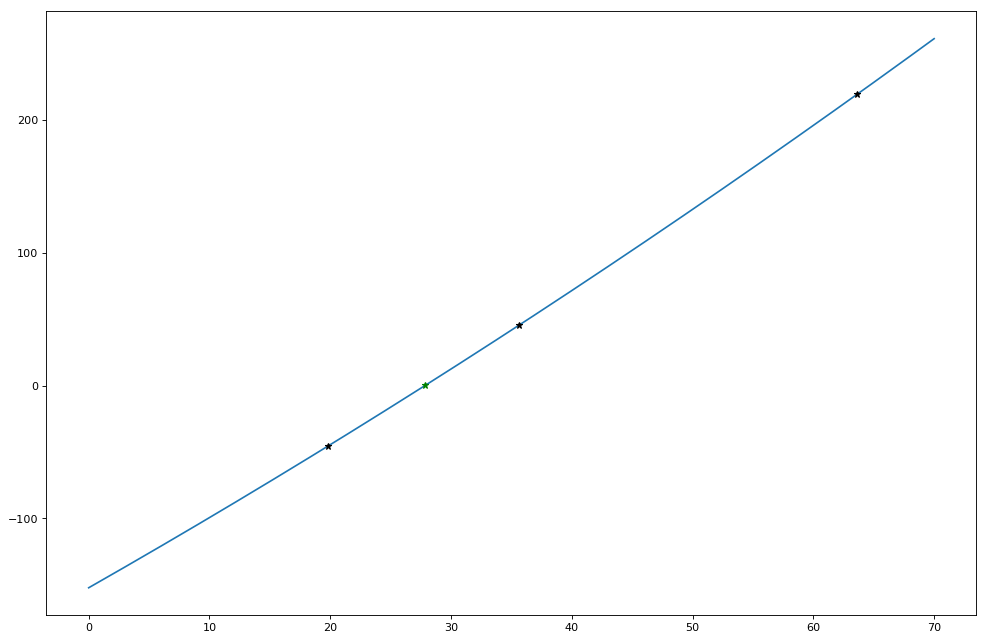

In [259]:
## polyfit (frequency as a function of PZT counts)
coeff3 = np.polyfit(dat['PZT'][peaks_45MHz][0:3],freq_45SB,2)

#frequency
frq3 = np.polyval(coeff,dat['PZT'])

fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(dat['PZT'],frq3)
plt.plot(SB45['PZT'] ,SB45['frq'],'*k')
plt.plot(carrier['PZT'], carrier['frq'], '*g')



In [256]:
## Finding the 9MHz peaks
s_width = 200000 #search width
freq_9SB = [(-fmod1), fmod1, (-fmod1+fsr)]
ind_9MHz_calc = [i*0 for i in range(len(freq_9SB))]
ind_9MHz_search = [i*0 for i in range(len(freq_9SB))]

for i in range(len(array_9MHz)): 
    loc_SB9 = min(frq, key=lambda x:abs(x-freq_9SB[i]))
    print(loc_SB9)
    #plotting initial estimate of 9MHz based off of 45 MHz fit
    loc_SB9_ind= np.where(frq==loc_SB9)[0][0]
    ind_9MHz_calc[i] = loc_SB9_ind
    peak_search = np.max(dat['OMC'][loc_SB9_ind-s_width:loc_SB9_ind+s_width])
    ind_9MHz_search[i] = np.where(dat['OMC'] == peak_search)[0][0]
    print(ind_9MHz_calc[i])
    print(ind_9MHz_search[i])
    
SB9 = {
    'frq' : [frq[t] for t in ind_9MHz],
    'time' : [dat['time'][t] for t in ind_9MHz],
    'PZT' : [dat['PZT'][t] for t in ind_9MHz],
    'OMC' : [dat['OMC'][t] for t in ind_9MHz]
}



-9.100246772027361
614470
463795
9.100320737627385
688501
834093
255.69978545710504
1619332
1489387


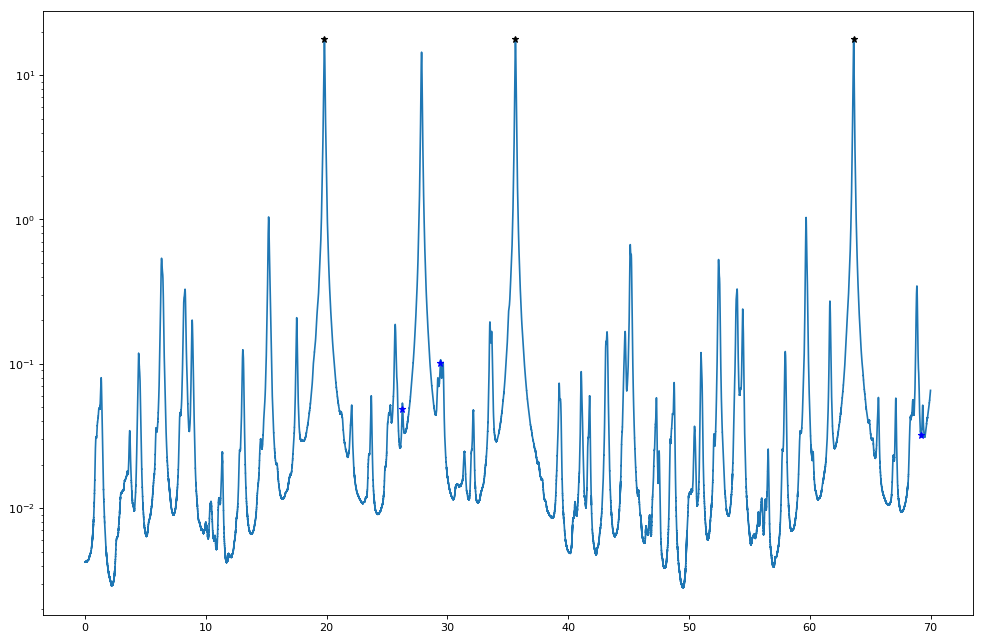

In [257]:
fig11 = plt.figure(figsize=(15, 10), dpi=80)
plt.semilogy(dat['PZT'],dat['OMC'])
plt.semilogy(dat['PZT'][ind_9MHz_search], dat['OMC'][ind_9MHz_search],'k*')
plt.semilogy(dat['PZT'][ind_9MHz_calc], dat['OMC'][ind_9MHz_calc],'b*')

In [164]:
np.append(dat['PZT'][ind_9MHz_search], dat['PZT'][peaks_45MHz])

array([25.439342, 29.757818, 68.539543, 20.027546, 35.75486 , 63.659584])

In [196]:

coeff2 = np.polyfit(np.append(dat['PZT'][ind_9MHz_search],dat['PZT'][peaks_45MHz]),np.append(freq_9SB,freq_45SB),2)

In [198]:
frq2 = np.polyval(coeff2,dat['PZT'])

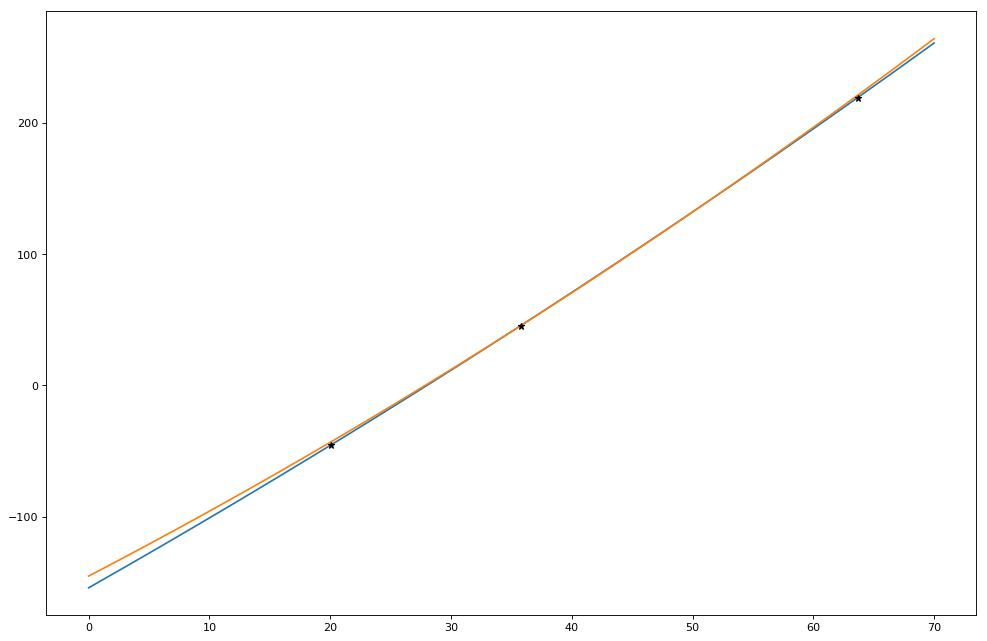

In [199]:
fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(dat['PZT'],frq)
plt.plot(dat['PZT'], frq2)
plt.plot(SB45['PZT'] ,SB45['frq'],'*k')


In [173]:
dat['PZT'][ind_9MHz_search]
frq2

array([-154.13171946, -154.13149638, -154.13127331, ...,  260.98698796,
        260.98724025,  260.98754566])

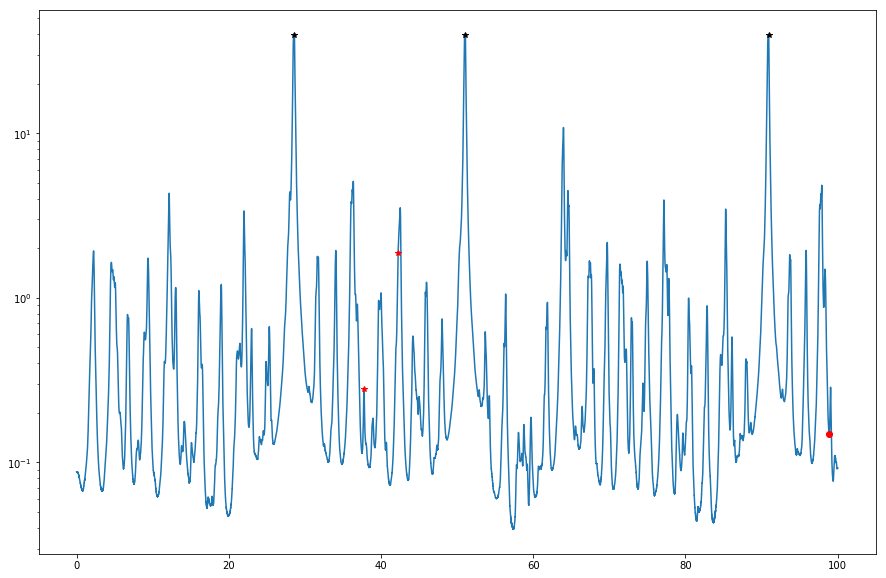

In [103]:
fig9 = plt.figure(figsize=(15,10))
plt.semilogy(dat['time'], dat['OMC'])
plt.semilogy(SB45['time'], SB45['OMC'], '*k')
plt.semilogy(SB9['time'], SB9['OMC'], '*r')
plt.semilogy(SB9['time'][2],SB9['OMC'][2], 'or' ) #Doesn't seem right

1.985219878974931e-05
655347
260.9875456636115
1638398


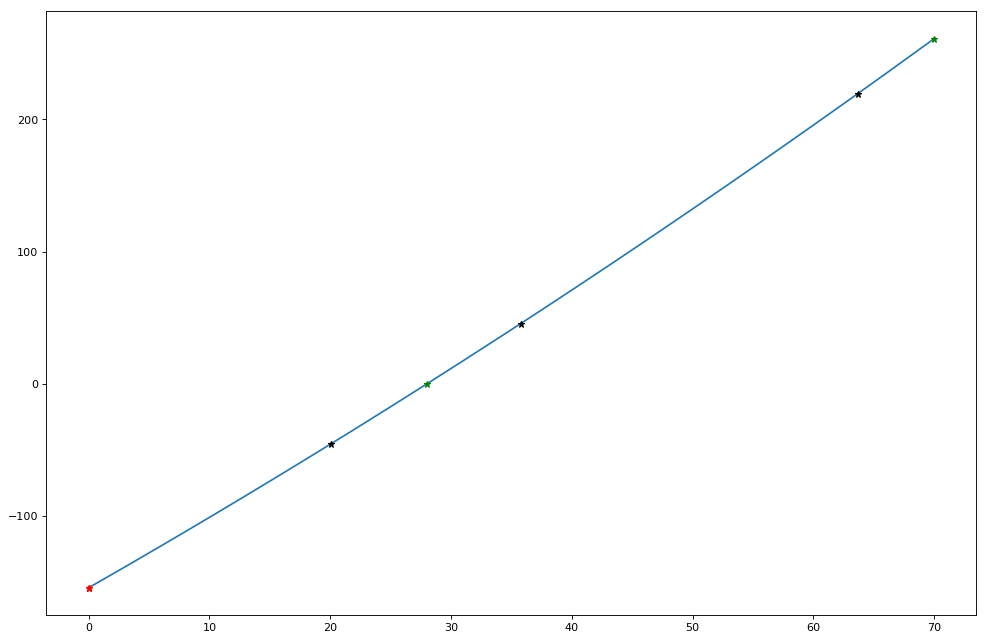

In [227]:
## Finding the carrier
array_car = [0, fsr]
ind_car = [i*0 for i in range(len(array_car))]
for i in range(len(array_car)): 
    loc_car = min(frq, key=lambda x:abs(x-array_car[i]))
    print(loc_car)
    loc_car_ind= np.where(frq==loc_car)[0][0]
    ind_car[i] = loc_car_ind
    print(ind_car[i])
    
carrier = {
    'frq' : [frq[i] for i in ind_car],
    'time' : [dat['time'][i] for i in ind_car],
    'PZT' : [dat['PZT'][i] for i in ind_car],
    'OMC' : [dat['OMC'][i] for i in ind_car]
    
}
    

fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(dat['PZT'],frq)
plt.plot(SB45['PZT'] ,SB45['frq'],'*k')
plt.plot(SB9['PZT'], SB9['frq'], '*r')
plt.plot(carrier['PZT'], carrier['frq'], '*g')


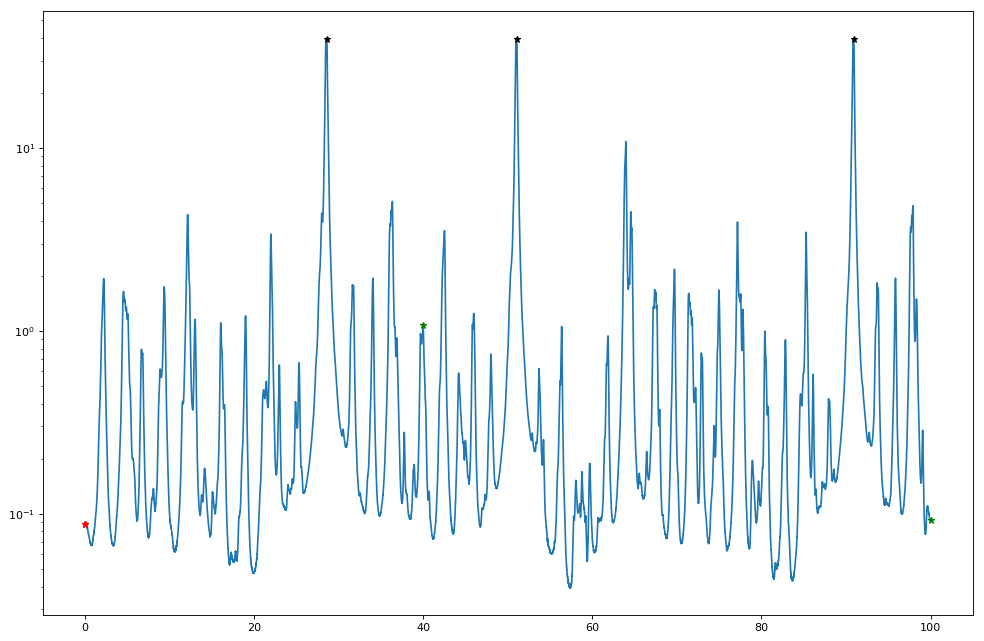

In [229]:
fig8 = plt.figure(figsize=(15, 10), dpi=80)

plt.semilogy(dat['time'], dat['OMC'])
plt.semilogy(SB45['time'] ,SB45['OMC'],'*k')
plt.semilogy(SB9['time'], SB9['OMC'], '*r')
plt.semilogy(carrier['time'], carrier['OMC'], '*g')

In [ ]:
# Higher order modes

carrier['HOM'] = [i*0 for i in range(HOM_on)]
SB9['HOM'] = [i*0 for i in range(HOM_on)]
SB45['HOM'] = [i*0 for i in range(HOM_on)]

for i in (range(HOM_on)):
    carrier['HOM'][i] = (i+1)*tms+ 
    SB9['HOM'][i]
    SB45['HOM'][i]
